In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
# Setting the working directory
import os
os.chdir('/Users/vishalraj/GitHub/Flight_Fare_Prediction')

In [3]:
from src.data.make_dataset import load_and_save_data_by_folder

path = 'data/raw'

# Load and save concatenated data by folder
load_and_save_data_by_folder(path)

In [3]:
import pandas as pd
df = pd.read_csv("data/interim/ATL/ATL_concatenated.csv")
print(df.head())

                              legId  searchDate  flightDate startingAirport  \
0  ee4aaff43c557e1704ebf52b8abf25ad  2022-05-13  2022-06-15             ATL   
1  284bffb121ffdafba55f69d6d89a4b7d  2022-05-13  2022-06-15             ATL   
2  8efdd07b82644146d45978f61d081f3b  2022-05-13  2022-06-15             ATL   
3  e03c8964b4feb4e206636a9c5c0015b2  2022-05-13  2022-06-15             ATL   
4  f44658d6761962cecc3eabc0a29d6ef9  2022-05-13  2022-06-15             ATL   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                BOS        PT8H51M           False         False      False   
1                BOS       PT12H31M           False         False      False   
2                BOS        PT4H35M           False         False      False   
3                BOS        PT4H38M           False         False      False   
4                BOS        PT6H43M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochS

In [3]:
# Extract dtypes
dtype_dict = df.dtypes.to_dict()

print(dtype_dict)

{'legId': dtype('O'), 'searchDate': dtype('O'), 'flightDate': dtype('O'), 'startingAirport': dtype('O'), 'destinationAirport': dtype('O'), 'travelDuration': dtype('O'), 'isBasicEconomy': dtype('bool'), 'isRefundable': dtype('bool'), 'isNonStop': dtype('bool'), 'totalFare': dtype('float64'), 'totalTravelDistance': dtype('float64'), 'segmentsDepartureTimeEpochSeconds': dtype('O'), 'segmentsDepartureTimeRaw': dtype('O'), 'segmentsArrivalTimeEpochSeconds': dtype('O'), 'segmentsArrivalTimeRaw': dtype('O'), 'segmentsArrivalAirportCode': dtype('O'), 'segmentsDepartureAirportCode': dtype('O'), 'segmentsAirlineName': dtype('O'), 'segmentsAirlineCode': dtype('O'), 'segmentsEquipmentDescription': dtype('O'), 'segmentsDurationInSeconds': dtype('O'), 'segmentsDistance': dtype('O'), 'segmentsCabinCode': dtype('O')}


In [5]:
from src.data.data_preprocessor_dl import DataPreprocessor

# Create an instance of the DataPreprocessor class
preprocessor = DataPreprocessor()

# Merge all datasets
preprocessor.merge_all_datasets()

# Take a 25% random sample of the merged dataset
sampled_data = preprocessor.data.sample(frac=0.25).reset_index(drop=True)

# Save the sampled dataset to a CSV file
sampled_data.to_csv('sampled_data.csv', index=False)

In [2]:
from src.data.data_preprocessor_dl import DataPreprocessor

# Create an instance of the DataPreprocessor class
data_preprocessor = DataPreprocessor()

# Process all folders and obtain processed data, the preprocessor object, and average features directly
processed_data, preprocessor, avg_features = data_preprocessor.merge_and_preprocess_all_datasets()

# Store processed_data in a variable to use in the next cell
%store processed_data
%store preprocessor
%store avg_features

print("Checking unique values for 'startingAirport' after preprocessing:")
print(processed_data['startingAirport'].unique())

print("\nCategory Mappings:")
print(data_preprocessor.category_mappings)

Removed 185195132 duplicate rows based on the specified subset of columns
Unique values in segmentsCabinCode after split and explode:
['coach' 'premium coach' 'first' 'business']
No missing values in the processed data.
totalTravelDistance                float32
segmentsDurationInSeconds          float32
segmentsDistance                   float32
startingAirport                       int8
destinationAirport                    int8
segmentsCabinCode                     int8
flightDate_year                      int16
flightDate_month                      int8
flightDate_day                        int8
flightDate_weekday                    int8
flightDate_is_weekend               object
segmentsDepartureTimeRaw_hour         int8
segmentsDepartureTimeRaw_minute       int8
modeFare                           float32
dtype: object
Stored 'processed_data' (DataFrame)
Stored 'preprocessor' (ColumnTransformer)
Stored 'avg_features' (DataFrame)
Checking unique values for 'startingAirport' after p

In [4]:
import pandas as pd
df1 = pd.read_csv("data/processed/merged_data_processed_dl.csv")
print(df1.head(20))
print(len(df1))

    totalTravelDistance  segmentsDurationInSeconds  segmentsDistance  \
0              1.040454                  -0.078716         -0.118611   
1              1.040454                  -0.078716          1.823883   
2              1.040454                   2.080591         -0.118611   
3              1.040454                   2.080591          1.823883   
4              1.040454                  -0.078716         -0.118611   
5              1.040454                  -0.078716          1.823883   
6              1.040454                   2.080591         -0.118611   
7              1.040454                   2.080591          1.823883   
8             -0.882614                   0.457672          0.443906   
9             -1.331850                  -0.835162         -1.067653   
10            -1.331850                  -0.835162         -0.475530   
11            -1.331850                  -0.202498         -1.067653   
12            -1.331850                  -0.202498         -0.47

In [5]:
# Extract dtypes
dtype_dict = df1.dtypes.to_dict()

print(dtype_dict)

{'totalTravelDistance': dtype('float64'), 'segmentsDurationInSeconds': dtype('float64'), 'segmentsDistance': dtype('float64'), 'startingAirport': dtype('int64'), 'destinationAirport': dtype('int64'), 'segmentsCabinCode': dtype('int64'), 'flightDate_year': dtype('int64'), 'flightDate_month': dtype('int64'), 'flightDate_day': dtype('int64'), 'flightDate_weekday': dtype('int64'), 'flightDate_is_weekend': dtype('bool'), 'segmentsDepartureTimeRaw_hour': dtype('int64'), 'segmentsDepartureTimeRaw_minute': dtype('int64'), 'modeFare': dtype('float64')}


In [7]:
unique_values = df1['segmentsCabinCode'].unique()
print(unique_values)

[2 7 8 9]


In [3]:
%store -r processed_data
%store -r preprocessor
%store -r avg_features

from src.models.train_model_vishal_raj import WideDeepModel

# Create an instance of WideDeepModel using processed data
flight_fare_model = WideDeepModel(processed_data, preprocessor, avg_features)

# Compute embedding sizes
flight_fare_model.compute_embedding_sizes()

# Build and compile the model
flight_fare_model.build_model()
flight_fare_model.compile_model()

# Train the model
history = flight_fare_model.train_model(epochs=50)

# Evaluate the model
rmse, mae = flight_fare_model.evaluate(batch_size=32768)

print(f"RMSE on test set: {rmse}")
print(f"MAE on test set: {mae}")

Epoch 1/50
888/889 [============================>.] - ETA: 0s - loss: 37945.6875 - mae: 131.5190 - mse: 37945.6875INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 38s 41ms/step - loss: 37945.0977 - mae: 131.5177 - mse: 37945.0977 - val_loss: 33316.6328 - val_mae: 122.5292 - val_mse: 33316.6328 - lr: 0.0050
Epoch 2/50
889/889 [==============================] - ETA: 0s - loss: 32203.5137 - mae: 121.6753 - mse: 32203.5137INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 36s 41ms/step - loss: 32203.5137 - mae: 121.6753 - mse: 32203.5137 - val_loss: 30766.1680 - val_mae: 119.9473 - val_mse: 30766.1680 - lr: 0.0050
Epoch 3/50
889/889 [==============================] - ETA: 0s - loss: 30353.6484 - mae: 119.6243 - mse: 30353.6484INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 36s 40ms/step - loss: 30353.6484 - mae: 119.6243 - mse: 30353.6484 - val_loss: 29621.5410 - val_mae: 119.1901 - val_mse: 29621.5410 - lr: 0.0100
Epoch 4/50
888/889 [============================>.] - ETA: 0s - loss: 29511.6934 - mae: 118.0566 - mse: 29511.6934INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 38ms/step - loss: 29511.5625 - mae: 118.0565 - mse: 29511.5625 - val_loss: 29002.9121 - val_mae: 117.4040 - val_mse: 29002.9121 - lr: 0.0100
Epoch 5/50
889/889 [==============================] - ETA: 0s - loss: 29127.4043 - mae: 116.9394 - mse: 29127.4043INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 36s 40ms/step - loss: 29127.4043 - mae: 116.9394 - mse: 29127.4043 - val_loss: 28685.9824 - val_mae: 114.8865 - val_mse: 28685.9824 - lr: 0.0100
Epoch 6/50
888/889 [============================>.] - ETA: 0s - loss: 28814.3711 - mae: 115.9801 - mse: 28814.3711INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 36s 41ms/step - loss: 28814.2227 - mae: 115.9798 - mse: 28814.2227 - val_loss: 28344.8242 - val_mae: 114.9597 - val_mse: 28344.8242 - lr: 0.0100
Epoch 7/50
887/889 [============================>.] - ETA: 0s - loss: 28517.7129 - mae: 115.0786 - mse: 28517.7129INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 28518.5000 - mae: 115.0786 - mse: 28518.5000 - val_loss: 28066.8789 - val_mae: 114.0384 - val_mse: 28066.8789 - lr: 0.0100
Epoch 8/50
889/889 [==============================] - ETA: 0s - loss: 28309.2070 - mae: 114.4163 - mse: 28309.2070INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 28309.2070 - mae: 114.4163 - mse: 28309.2070 - val_loss: 27952.6426 - val_mae: 114.4627 - val_mse: 27952.6426 - lr: 0.0100
Epoch 9/50
887/889 [============================>.] - ETA: 0s - loss: 28146.0469 - mae: 113.8884 - mse: 28146.0469INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 28147.9590 - mae: 113.8884 - mse: 28147.9590 - val_loss: 27749.1816 - val_mae: 111.9527 - val_mse: 27749.1816 - lr: 0.0100
Epoch 10/50
887/889 [============================>.] - ETA: 0s - loss: 28022.7285 - mae: 113.4847 - mse: 28022.7285INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 38ms/step - loss: 28021.8359 - mae: 113.4835 - mse: 28021.8359 - val_loss: 27630.3613 - val_mae: 111.8537 - val_mse: 27630.3613 - lr: 0.0100
Epoch 11/50
887/889 [============================>.] - ETA: 0s - loss: 27927.8457 - mae: 113.1711 - mse: 27927.8457INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 38ms/step - loss: 27927.4961 - mae: 113.1712 - mse: 27927.4961 - val_loss: 27543.2578 - val_mae: 112.1029 - val_mse: 27543.2578 - lr: 0.0100
Epoch 12/50
887/889 [============================>.] - ETA: 0s - loss: 27851.2285 - mae: 112.9190 - mse: 27851.2285INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27851.5234 - mae: 112.9191 - mse: 27851.5234 - val_loss: 27494.9043 - val_mae: 111.4198 - val_mse: 27494.9043 - lr: 0.0100
Epoch 13/50
888/889 [============================>.] - ETA: 0s - loss: 27780.0312 - mae: 112.6836 - mse: 27780.0312INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27779.9414 - mae: 112.6836 - mse: 27779.9414 - val_loss: 27343.5215 - val_mae: 111.3832 - val_mse: 27343.5215 - lr: 0.0100
Epoch 14/50
889/889 [==============================] - ETA: 0s - loss: 27715.5469 - mae: 112.4632 - mse: 27715.5469INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27715.5469 - mae: 112.4632 - mse: 27715.5469 - val_loss: 27279.3008 - val_mae: 111.5178 - val_mse: 27279.3008 - lr: 0.0100
Epoch 15/50
887/889 [============================>.] - ETA: 0s - loss: 27675.5645 - mae: 112.3212 - mse: 27675.5645INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27674.7676 - mae: 112.3202 - mse: 27674.7676 - val_loss: 27239.9668 - val_mae: 111.1547 - val_mse: 27239.9668 - lr: 0.0100
Epoch 16/50
889/889 [==============================] - ETA: 0s - loss: 27639.0215 - mae: 112.1991 - mse: 27639.0215INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27639.0215 - mae: 112.1991 - mse: 27639.0215 - val_loss: 27208.5293 - val_mae: 110.9020 - val_mse: 27208.5293 - lr: 0.0100
Epoch 17/50
889/889 [==============================] - 34s 38ms/step - loss: 27607.2656 - mae: 112.0932 - mse: 27607.2656 - val_loss: 27224.9629 - val_mae: 110.2420 - val_mse: 27224.9629 - lr: 0.0100
Epoch 18/50
889/889 [==============================] - ETA: 0s - loss: 27576.7754 - mae: 112.0033 - mse: 27576.7754INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27576.7754 - mae: 112.0033 - mse: 27576.7754 - val_loss: 27160.2500 - val_mae: 110.7526 - val_mse: 27160.2500 - lr: 0.0100
Epoch 19/50
887/889 [============================>.] - ETA: 0s - loss: 27557.3555 - mae: 111.9490 - mse: 27557.3555INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27557.1562 - mae: 111.9496 - mse: 27557.1562 - val_loss: 27112.6387 - val_mae: 110.1448 - val_mse: 27112.6387 - lr: 0.0100
Epoch 20/50
889/889 [==============================] - 34s 38ms/step - loss: 27525.8730 - mae: 111.8701 - mse: 27525.8730 - val_loss: 27125.1035 - val_mae: 109.8427 - val_mse: 27125.1035 - lr: 0.0100
Epoch 21/50
889/889 [==============================] - ETA: 0s - loss: 27513.5977 - mae: 111.8238 - mse: 27513.5977INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 35s 39ms/step - loss: 27513.5977 - mae: 111.8238 - mse: 27513.5977 - val_loss: 27096.5000 - val_mae: 111.2261 - val_mse: 27096.5000 - lr: 0.0100
Epoch 22/50
889/889 [==============================] - ETA: 0s - loss: 27495.1953 - mae: 111.7761 - mse: 27495.1953INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 38ms/step - loss: 27495.1953 - mae: 111.7761 - mse: 27495.1953 - val_loss: 27022.0703 - val_mae: 110.2079 - val_mse: 27022.0703 - lr: 0.0100
Epoch 23/50
889/889 [==============================] - 34s 38ms/step - loss: 27476.6992 - mae: 111.7177 - mse: 27476.6992 - val_loss: 27132.5078 - val_mae: 112.2569 - val_mse: 27132.5078 - lr: 0.0100
Epoch 24/50
887/889 [============================>.] - ETA: 0s - loss: 27461.2832 - mae: 111.6806 - mse: 27461.2832INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 38ms/step - loss: 27463.6562 - mae: 111.6812 - mse: 27463.6562 - val_loss: 26999.1191 - val_mae: 110.4267 - val_mse: 26999.1191 - lr: 0.0100
Epoch 25/50
889/889 [==============================] - 34s 38ms/step - loss: 27448.6973 - mae: 111.6463 - mse: 27448.6973 - val_loss: 27047.9844 - val_mae: 111.7573 - val_mse: 27047.9844 - lr: 0.0100
Epoch 26/50
889/889 [==============================] - 34s 38ms/step - loss: 27438.4766 - mae: 111.6142 - mse: 27438.4766 - val_loss: 27052.5820 - val_mae: 109.7177 - val_mse: 27052.5820 - lr: 0.0100
Epoch 27/50
889/889 [==============================] - ETA: 0s - loss: 27429.3223 - mae: 111.5902 - mse: 27429.3223INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 34s 39ms/step - loss: 27429.3223 - mae: 111.5902 - mse: 27429.3223 - val_loss: 26951.8633 - val_mae: 110.5981 - val_mse: 26951.8633 - lr: 0.0100
Epoch 28/50
889/889 [==============================] - 34s 38ms/step - loss: 27411.7324 - mae: 111.5486 - mse: 27411.7324 - val_loss: 26972.6211 - val_mae: 109.9885 - val_mse: 26972.6211 - lr: 0.0100
Epoch 29/50
889/889 [==============================] - 34s 38ms/step - loss: 27401.7188 - mae: 111.5266 - mse: 27401.7188 - val_loss: 26999.2051 - val_mae: 109.2139 - val_mse: 26999.2051 - lr: 0.0100
Epoch 30/50
191/191 [==============================] - 1s 7ms/step
RMSE on test set: 164.08128356933594
MAE on test set: 110.55744171142578


In [ ]:
# from src.models.train_model import WideDeepModel

# # Create an instance of FlightFareModel and load data
# flight_fare_model = WideDeepModel()

# # Compute embedding sizes
# flight_fare_model.compute_embedding_sizes()

# # Hyperparameter tuning
# flight_fare_model.hyperparameter_tuning(epochs=10)

# # Train the model using the best hyperparameters
# flight_fare_model.train_model(epochs=10)  # or more epochs

# # Evaluate the model
# rmse, mae = flight_fare_model.evaluate(flight_fare_model.data)

# print(f"RMSE on test set: {rmse}")
# print(f"MAE on test set: {mae}")

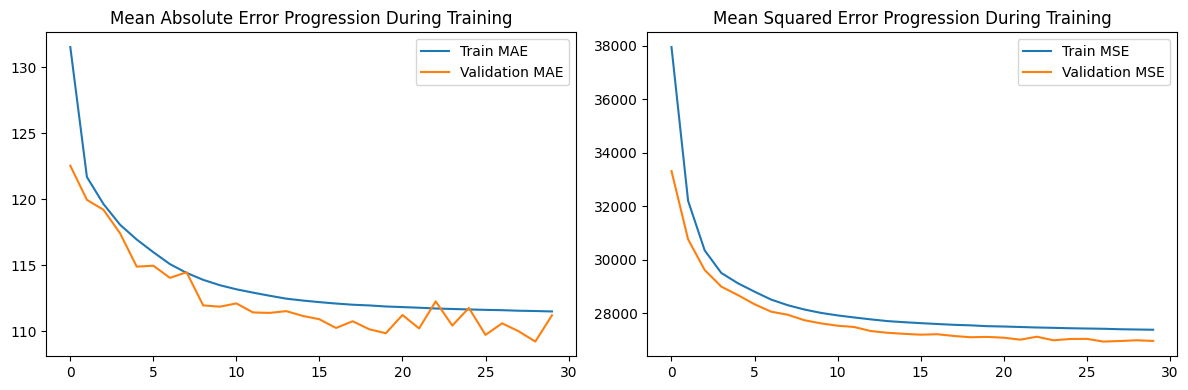

In [4]:
# Plot training history
import matplotlib.pyplot as plt

# Plot MAE and MSE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error Progression During Training')

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.legend()
plt.title('Mean Squared Error Progression During Training')

plt.tight_layout()
plt.show()